# Assignment 2: Linear Models and Validation Metrics (40 marks total)
### Due: February 14 at 11:59pm

### Name: 

### In this assignment, you will need to write code that uses linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

## Part 1: Classification (20 marks)

You have been asked to develop code that can help the user determine if the email they have received is spam or not. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 0: Import Libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore') #ignoring some deprication warnings

### Step 1: Data Input (1 mark)

The data used for this task can be imported using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/spam.html

Use the yellowbrick function `load_spam()` to load the spam dataset into the feature matrix `X` and target vector `y`.

Print the size and type of `X` and `y`.

In [14]:
# TO DO: Import spam dataset from yellowbrick library (0.5 marks)
from yellowbrick.datasets import load_spam

x, y = load_spam()

# TO DO: Print the size of X and y (0.5 marks)
if (x is None or y is None):
    print("Error")
else:
    print(f"The type of x is: {type(x)} and has the size: {x.shape}") #Based on the data set should be (4600, 57)
    print(f"The type of x is: {type(y)} and has the size: {y.shape}") #Based on the data set should be (4600,)

The type of x is: <class 'pandas.core.frame.DataFrame'> and has the size: (4600, 57)
The type of x is: <class 'pandas.core.series.Series'> and has the size: (4600,)


### Step 2: Data Processing (2 marks)

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values.

In [17]:
# TO DO: Check if there are any missing values and fill them in if necessary (1 mark)
missing_in_x = x.isnull().sum().sum() 
missing_in_y = y.isnull().sum()

print(f"There are: {missing_in_x} values missing in x")
print(f"There are: {missing_in_y} values missing in y")

#There are no missing values, but we will fill them in just in case

x.fillna(method="ffill")
y.fillna(method="ffill")


There are: 0 values missing in x
There are: 0 values missing in y


For this task, we want to test if the linear model would still work if we used less data. Use the `train_test_split` function from sklearn to create a new feature matrix named `X_small` and a new target vector named `y_small` that contain **5%** of the data. Use `random_state=0`.

In [23]:
# TO DO: Create X_small and y_small (1 mark)
from sklearn.model_selection import train_test_split

x_small, _,  y_small, _ = train_test_split(x, y, train_size=0.05, random_state = 0)

print(f"The shape of x_small is: {x_small.shape}") #Should be (230, 57) as 4600 x 0.05 = 230 
print(f"The shape of y_small is: {y_small.shape}") #Should be (230, ) as 4600 x 0.05 = 230 

The shape of x_small is: (230, 57)
The shape of y_small is: (230,)


### Step 3: Implement Machine Learning Model

1. Import `LogisticRegression` from sklearn
2. Instantiate model `LogisticRegression(max_iter=2000)`
3. Implement the machine learning model with three different datasets: 
    - `X` and `y`
    - Only first two columns of `X` and `y`
    - `X_small` and `y_small`

### Step 4: Validate Model 

Calculate the training, validation and testing accuracies for the three different tests implemented in Step 3. For this case, you can use `cross_validate()` with `cv=5` and `scoring='accuracy'` to get the training and validation accuracies for each of the three datasets. For the testing set, you can use 10% of the data, split with `random_state=0`.

### Step 5.1: Visualize Results (3 marks)

1. Create a pandas DataFrame `results` with columns: Data size, training accuracy, validation accuracy and testing accuracy
2. Add the data size, training accuracy and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [34]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# STEP 3 & 4:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

# Full x and y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state = 0)

cv_result_full = cross_validate(LogisticRegression(max_iter=2000), x_train, y_train, cv=5, scoring='accuracy', return_train_score = True)
train_accuracy_full = cv_result_full['train_score'].mean()
val_accuracy_full = cv_result_full['test_score'].mean()

model = LogisticRegression(max_iter=2000)
model.fit(x_train, y_train)

test_accuracy_full = model.score(x_test, y_test)

print("Full X and Y:")
print("-------------------------")
print(f"The training accuracy is: {train_accuracy_full}")
print(f"The validation accuracty is: {val_accuracy_full}")
print(f"The testing accuracy is: {test_accuracy_full}")

print()

# Only first two columns
first_2_x = x.iloc[:, :2]
x_train, x_test, y_train, y_test = train_test_split(first_2_x, y, test_size=0.10, random_state = 0)

cv_result_first_2 = cross_validate(LogisticRegression(max_iter=2000), x_train, y_train, cv=5, scoring='accuracy', return_train_score = True)
train_accuracy_first_2 = cv_result_first_2['train_score'].mean()
val_accuracy_first_2 = cv_result_first_2['test_score'].mean()

model.fit(x_train, y_train)

test_accuracy_first_2 = model.score(x_test, y_test)

print("First two X and Y:")
print("-------------------------")
print(f"The training accuracy is: {train_accuracy_first_2}")
print(f"The validation accuracty is: {val_accuracy_first_2}")
print(f"The testing accuracy is: {test_accuracy_first_2}")

print()

# Small X and Small Y
x_train, x_test, y_train, y_test = train_test_split(x_small, y_small, test_size = 0.10, random_state = 0)

cv_result_small = cross_validate(LogisticRegression(max_iter=2000), x_train, y_train, cv=5, scoring='accuracy', return_train_score=True)
train_accuracy_small = cv_result_small['train_score'].mean()
val_accuracy_small = cv_result_small['test_score'].mean()

model.fit(x_train, y_train)

test_accuracy_small = model.score(x_test, y_test)

print("Small X and Small Y:")
print("-------------------------")
print(f"The training accuracy is: {train_accuracy_small}")
print(f"The validation accuracty is: {val_accuracy_small}")
print(f"The testing accuracy is: {test_accuracy_small}")

print()

# STEP 5:

results = pd.DataFrame({
    "Data Size": ["Full X and Y", "First 2 Columns", "X_small"],
    "Training Accuracy": [train_accuracy_full, train_accuracy_first_2, train_accuracy_small],
    "Validation Accuracy": [val_accuracy_full, val_accuracy_first_2, val_accuracy_small],
    "Testing Accuracy": [test_accuracy_full, test_accuracy_first_2, test_accuracy_small]
})

print(results)



Full X and Y:
-------------------------
The training accuracy is: 0.9292270531400966
The validation accuracty is: 0.9227053140096618
The testing accuracy is: 0.9391304347826087

First two X and Y:
-------------------------
The training accuracy is: 0.6146739130434782
The validation accuracty is: 0.6157004830917875
The testing accuracy is: 0.591304347826087

Small X and Small Y:
-------------------------
The training accuracy is: 0.9492515516611902
The validation accuracty is: 0.8980255516840883
The testing accuracy is: 0.8695652173913043
         Data Size  Training Accuracy  Validation Accuracy  Testing Accuracy
0     Full X and Y           0.929227             0.922705          0.939130
1  First 2 Columns           0.614674             0.615700          0.591304
2          X_small           0.949252             0.898026          0.869565


### Step 5.2: Visualize Classification Errors (2 marks)

In this section, print the confusion matrix to investigate the number of false positives vs. false negatives for the testing data. Use the full dataset for this analysis.

In [38]:
# TO DO: Retrieve target vector and predicted values for validation set using full dataset (1 mark)
from sklearn.model_selection import cross_val_predict

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state = 0) #I'm assuming you have to do this because it needs to reset the values of y_train and y_test using the full dataset before the prediction

y_val_pred = cross_val_predict(LogisticRegression(max_iter=2000), x_train, y_train, cv=5)

y_val = y_train

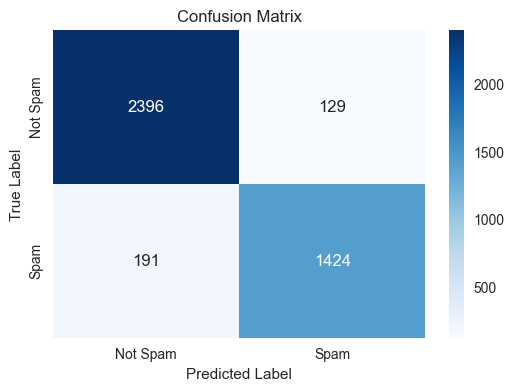

In [39]:
# TO DO: Print confusion matrix using a heatmap (1 mark)
# HINT: To remove scientific notation from a heatmap, set the parameter fmt='d'
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_val_pred)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d', xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


### Questions (8 marks)
1. How do the training and validation accuracy change depending on the amount of data used? Explain with values.
1. Why do the training and validation accuracy behave this way when the amount of data is changed? Relate your answer to concepts discussed in class.
1. Was any randomness included in this analysis? If yes, what step(s) introduced the randomness? What impact could this have on the results?
1. In this case, what do a false positive and a false negative represent? Which one is worse?

*ANSWER HERE*

1. The training and validation accuracy change depending on the amount of data. Through my experimentation, it seems that the more data that is available, the better the accuracy as it can use more values to train and test the model. This is shown when comparing the full data set versus only the first two columns. Using the full dataset, we get training accuracy of 0.929227 and validation accuracy of 0.922705 compared to 0.614674 and 0.615700 respectably, when only using the first two rows as not much data can be used to accurately train the model.
2. They behave this way as the as it can heavily influence the amount of true positive, false positive, true negative and false negative in the model. When you have less data to train the model, there can be a larger number of incorrect values and this then can lower the accuracy for training and validation.
3. No randomness was included. When we set the value of random_state to 0, this allows us to create deterministic, repeatable results by setting a seed rather than randomized results. This could have an impact because if randomization is used, the training and test values would be different which can impact the accuracy of our model each iteration and we would be unable to repeat our results.
4. A false positive is spam mail which got labelled as non-spam mail and allowed to get into the user's mailbox. A false negative is a real email that was labelled as spam and sent to the junk folder. A false negative is much worse as this can be an important email which may likely be missed as it is in the spam folder. A false positive is not as bad because a user can just ignore a spam email.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE - BE SPECIFIC*

1. I sourced my code from the lab files and websites such as geeksforgeeks and scikit learn documentation.
2. These steps were completed in order until completion
3. Generative AI was used to clarify what some functions would perform and explain what certain parameters were doing. Using promps such as "Explain what cross_validate function does" and "What does the parameter random_state do in train_test_split?" This would sometimes generate code to demonstrate which was used as inspiration for my code.
4. One of the challenges I faced was learning how to use the different functions such as train_test_split and cross_validate because I was getting confused on which variables to use in which functions. Searching up documentation helped explain it a lot as it helped me understand what exactly was being returned and done by the functions

Websites used: GeeksforGeeks, W3Schools, Scikit-Learn

## Part 2: Regression (18 marks)

For this section, we will be using the auto-mpg dataset from Lab 2. You will need to repeat the steps from Part 1 for this analysis.

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded from UCI website: https://archive.ics.uci.edu/ml/datasets/Auto%2BMPG 

Load the auto-mpg dataset and inspect the first few rows

In [95]:
# TO DO: Import auto-mpg data and inspect the first few rows (0.5 marks)
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]

df = pd.read_csv(url, delim_whitespace=True, names=column_names)

df.head()


C:\Users\gerar\AppData\Local\Temp\ipykernel_18840\1275555825.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=column_names)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### Step 2: Data Processing (2.5 marks)

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values.

In [96]:
# TO DO: Check if there are any missing values and fill them in if necessary (1 mark)
df.replace("?", np.nan, inplace=True) #This is because when you open the CSV, the missing values are in "?" form
missing_values = df.isnull().sum().sum()

print(f"There are {missing_values} values missing in the data")

#There are some missing values, so we will fill them in

df.ffill(inplace=True)

missing = df.isnull().sum().sum()
print(f"There are {missing} valules missing in the data")


There are 6 values missing in the data
There are 0 valules missing in the data


Remove any columns that do not have numerical data.

In [97]:
# TO DO: Remove non-numeric data (0.5 marks)
df = df.select_dtypes(include=[np.number])

df.head()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
0,18.0,8,307.0,3504.0,12.0,70,1
1,15.0,8,350.0,3693.0,11.5,70,1
2,18.0,8,318.0,3436.0,11.0,70,1
3,16.0,8,304.0,3433.0,12.0,70,1
4,17.0,8,302.0,3449.0,10.5,70,1


Split the auto-mpg data into the feature matrix and target vector. Inspect the first few columns of the feature matrix to make sure it split properly.

In [98]:
# TO DO: Create feature matrix and target vector (1 mark) 
x = df.drop(columns=['mpg']) # All columns except mpg
y = df['mpg'] # Only mpg as it is the only target

print("Feature Matrix:")
print(x.head())
print("Target Vector:")
print(y.head())

Feature Matrix:
   cylinders  displacement  weight  acceleration  model_year  origin
0          8         307.0  3504.0          12.0          70       1
1          8         350.0  3693.0          11.5          70       1
2          8         318.0  3436.0          11.0          70       1
3          8         304.0  3433.0          12.0          70       1
4          8         302.0  3449.0          10.5          70       1
Target Vector:
0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64


### Step 3: Implement and Validate Machine Learning Model (2.5 marks)

1. Import any required libraries
1. Split the data into training and testing sets (testing data should be 10% of the dataset)
1. Instantiate model `LinearRegression()`
1. Train and validate the machine learning model using the training set (using `cross_validate()` with `cv=5` and `scoring='r2'`)
1. Print the training and validation accuracy 

In [99]:
# TO DO: ADD YOUR CODE HERE
# Note: for any random state parameters, you can use random_state = 0
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=0)

model = LinearRegression()

cv_result = cross_validate(LinearRegression(), x_train, y_train, cv=5, scoring='r2', return_train_score=True)

train_accuracy = cv_result['train_score'].mean()
val_accuracy = cv_result['test_score'].mean()

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Training Accuracy: 0.8161902691658671
Validation Accuracy: 0.8083204052710883


### Step 4: Test Model (1 mark)

Calculate the testing accuracy using the R^2 score

In [100]:
# TO DO: ADD YOUR CODE HERE

model.fit(x_train, y_train)

test_accuracy = model.score(x_test, y_test)

print("Testing Accuracy:", test_accuracy)


Testing Accuracy: 0.8508174962521798


### Step 5: Visualize Results (1.5 marks)

1. Plot the relationship between each of the features and the target vector using `pairplot`
1. Plot the correlation matrix
1. Print the coefficients for each feature and the intercept

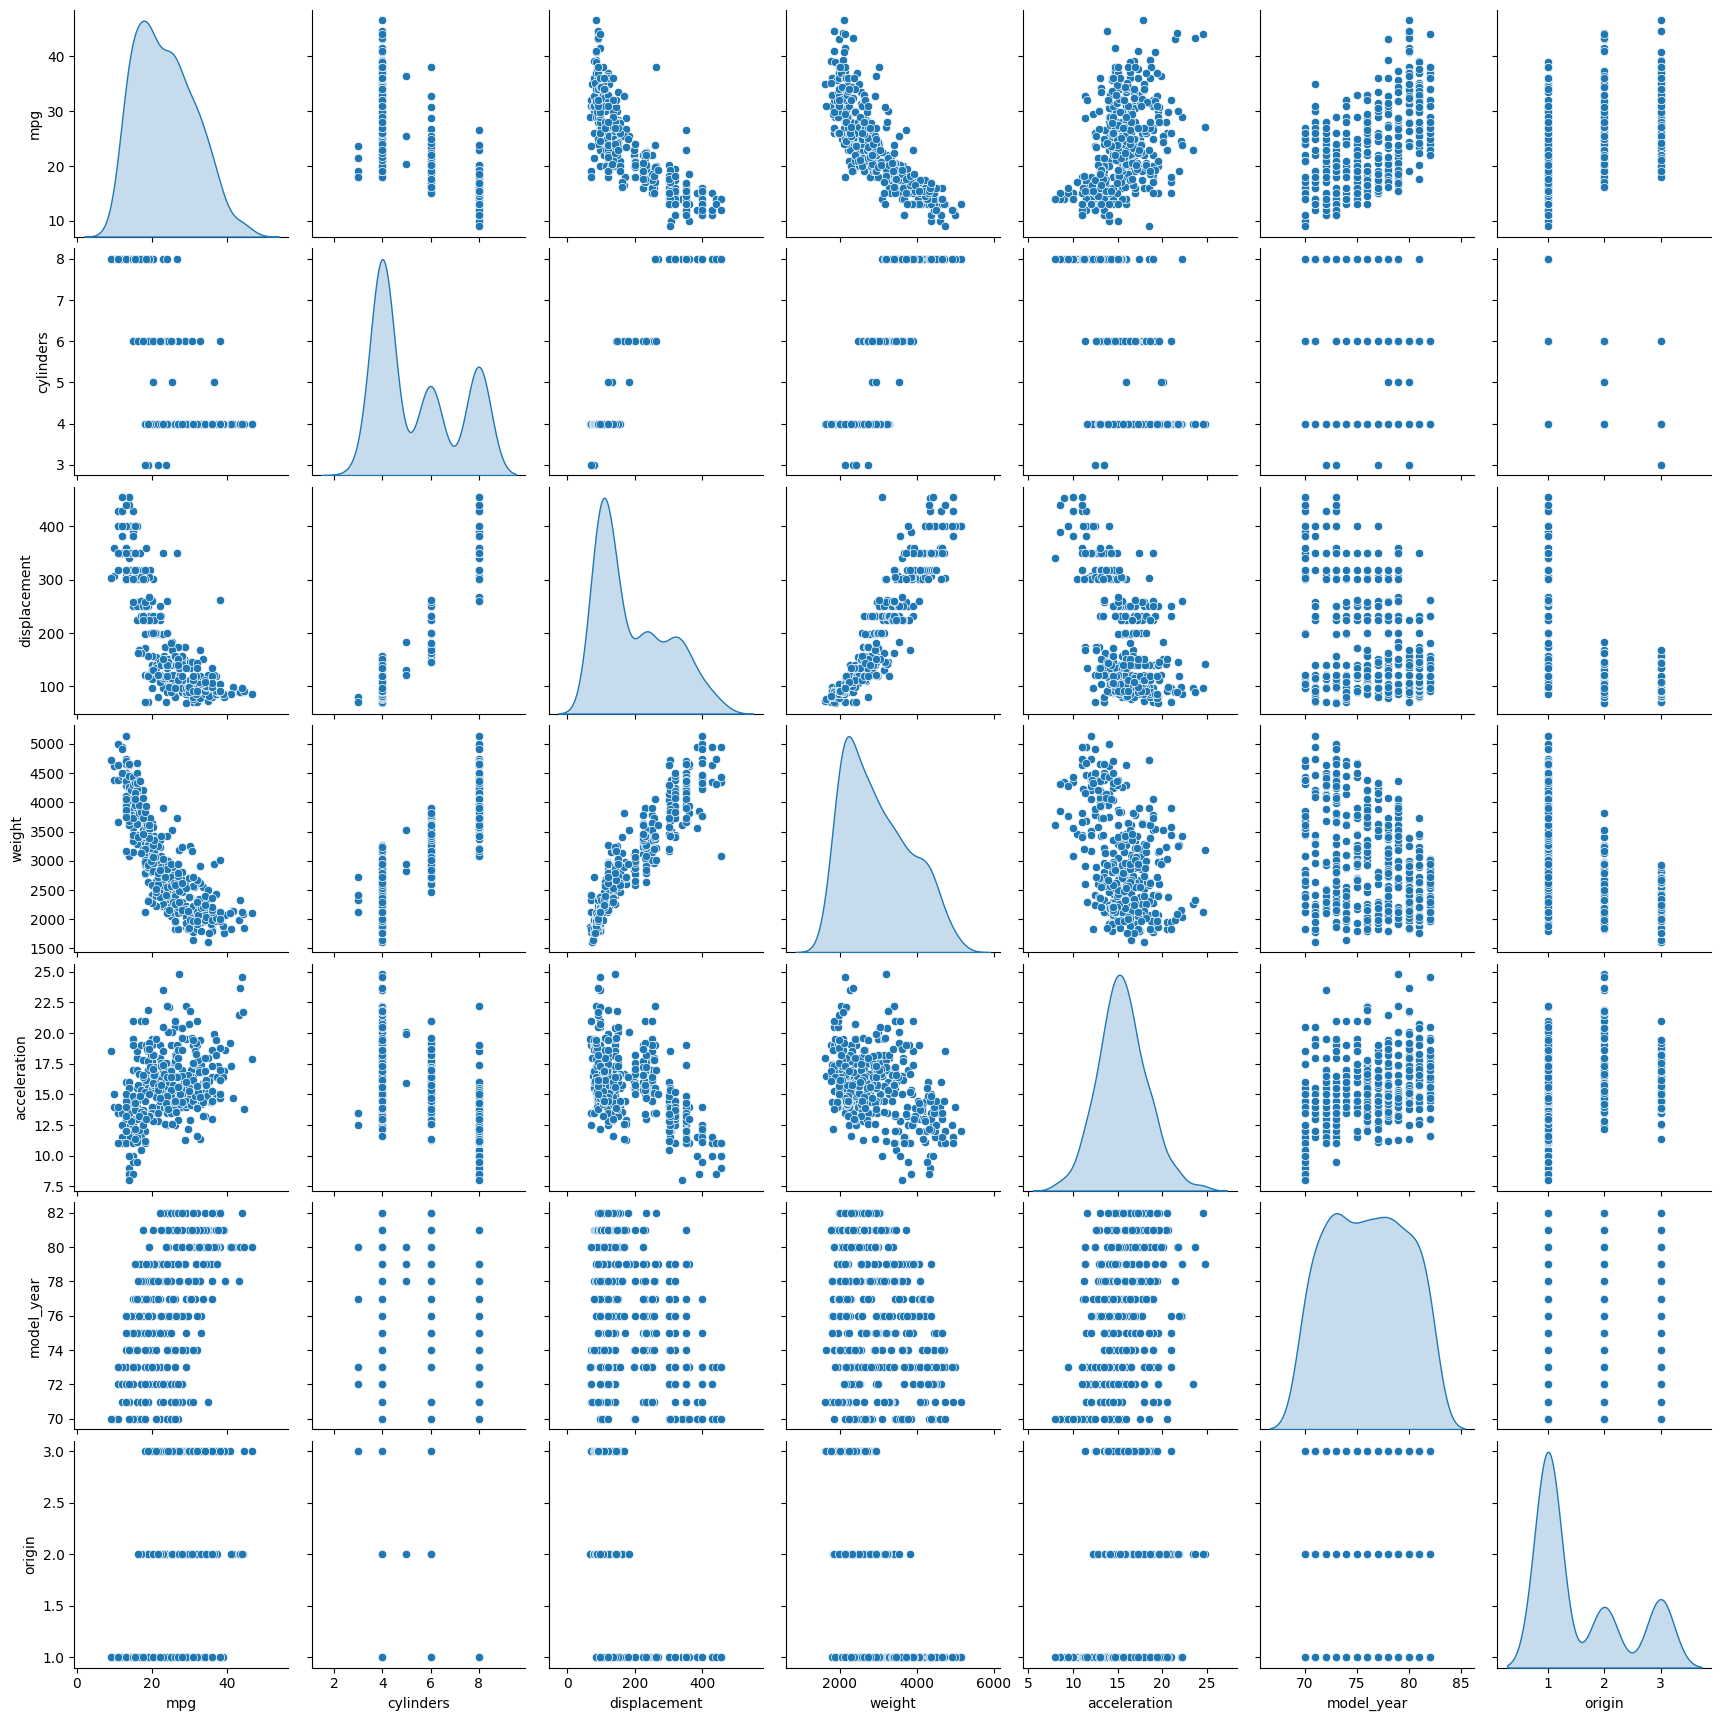

In [101]:
# TO DO: Plot pairplot (0.5 marks)
sns.pairplot(df, diag_kind='kde')  # kde for better visualization of distributions
plt.show()

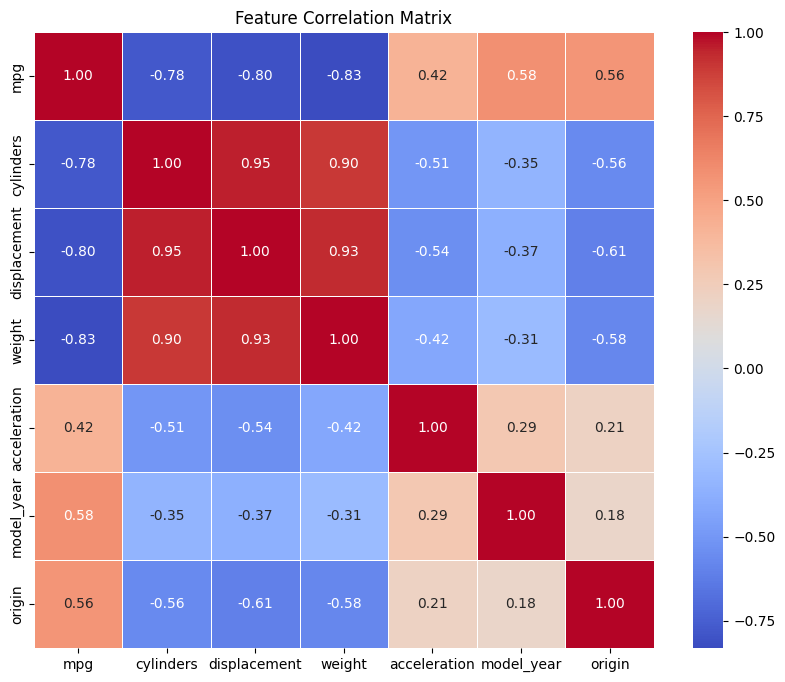

In [102]:
# TO DO: Plot correlation matrix (0.5 marks)
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [103]:
# TO DO: Print model coefficients and intercept (0.5 marks)
#Reset the model
model = LinearRegression()
model.fit(x_train, y_train)

print("Intercept:", model.intercept_)
print("Feature Coefficients:")

for feature, coef in zip(x_train.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

Intercept: -19.578529288135538
Feature Coefficients:
cylinders: -0.4627
displacement: 0.0183
weight: -0.0067
acceleration: 0.2118
model_year: 0.7437
origin: 1.4208


### Questions (6 marks)
1. Did using a linear model produce good results for this dataset? Why or why not?
1. Do the coefficients for each of the features make sense when compared to the `pairplot` and the correlation matrix? Why or why not?
1. If you repeat this analysis with ridge regression, do the results change significantly? What do you think is the cause of these (changed or unchanged) results?

*ANSWER HERE*

1. Linear model produced good results. This is because the R2 score is closer to 1 than 0 (our result of around 0.85) which means that a linear model is acceptable for this type of data
2. Yes they make sense as they show a diagonal style matrix. This is correct as the coefficients should be influenced the heaviest by themselves and less by the other coefficients.
3. ???????

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE - BE SPECIFIC*

1. The code was sourced from the same websites used for part 1. Using GeeksforGeeks, Scikit-Learn and W3Schools
2. These steps were completed slightly out of order, focusing more on the questions which were worth more points as I ran into some issues late and was scrambling for time
3. Similar prompts were used as part 1, such as "how to use pairplot to visualize data" to be able to take inspiration from the code and be able to better understand what each function was doing.
4. The main problem I faced was removing NaN values. As the values were in a "?" format rather than NaN, I was struggling to understand why some of my code was not working to replace the values. By checking the CSV file directly and scrolling through, I was able to find that the values were formatted like this and I could begin working on a fix

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challenging, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

I enjoyed learning how to create a heatmap with the results. I personally struggle understanding data sometimes without a visual representation and a heat map helped me understand how the program truly comes up with its results.
I found it very interesting that the model was still able to come up with results above 50% when trained with data as low as two rows. It was clear that more data is always better, but i did not know how little could be used to create a very rough version of the model
